In [67]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
from astropy import units as u, constants as c
# This makes it possible to find the modules in the Python directory
sys.path.append('./Python')
sys.path.append('/Users/jaguirre/Documents/Teaching/ASTR001/2018C/PyCode/')
# This works because of the sys.path.append above
import KID_model_functions as kids
from ASTR001 import Qprint

In [3]:
# Fiducial model
alpha = 0.73*u.dimensionless_unscaled
f = 200*u.MHz
Tstage = 0.215*u.K
Tc = 1.39*u.K
V = 57*np.power(u.micron,3)
n_star = 1318*(np.power(u.micron,-3))
tau_max = 35*u.microsecond
eta_pb = 0.57
nu_opt = (350*u.micron).to(u.GHz,equivalencies=u.spectral())
trans=1
eta_opt = 0.17*u.dimensionless_unscaled
N0=1.72e10*np.power(u.micron,-3)*np.power(u.eV,-1)

In [44]:
T_BB = np.linspace(0,10,30)*u.K
P_inc = kids.TBB_to_Pinc(T_BB)#.to(u.fW)

(0.001, 10)

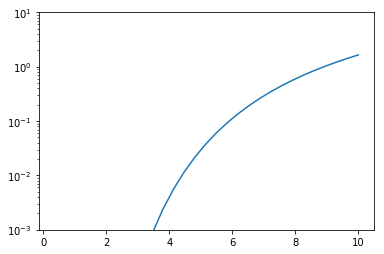

In [45]:
plt.semilogy(T_BB[1:],P_inc[1:])
plt.ylim([1e-3,10])

In [46]:
%%time
S_xx = kids.Sxx(alpha,f,Tstage,Tc,T_BB,V,n_star,tau_max,eta_pb,nu_opt,eta_opt=0.17,trans=1,N0=N0)

/Users/jaguirre/anaconda3/envs/starfire/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


CPU times: user 455 ms, sys: 3.16 ms, total: 458 ms
Wall time: 455 ms


In [41]:
np.arange(0.1,1,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

/Users/jaguirre/anaconda3/envs/starfire/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


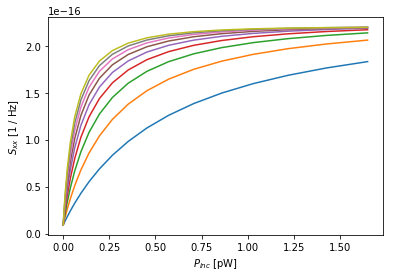

In [47]:
for eta_opt in np.arange(0.1,1,0.1):
    S_xx = kids.Sxx(alpha,f,Tstage,Tc,T_BB,V,n_star,tau_max,eta_pb,nu_opt,eta_opt=eta_opt,trans=1,N0=N0)
    plt.plot(P_inc,S_xx)
plt.xlabel(r'$P_{inc}$ ['+P_inc.unit.to_string()+']')
plt.ylabel(r'$S_{xx}$ ['+S_xx.unit.to_string()+']')
plt.show()

100.0 1 / micron3


/Users/jaguirre/anaconda3/envs/starfire/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


400.0 1 / micron3
700.0 1 / micron3
1000.0 1 / micron3
1300.0 1 / micron3


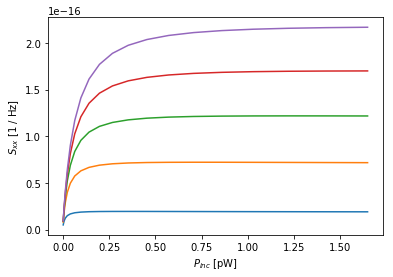

CPU times: user 2.43 s, sys: 11 ms, total: 2.45 s
Wall time: 2.44 s


In [56]:
%%time
for n_star in np.arange(100,1500,300)*np.power(u.micron,-3):
    print(n_star)
    S_xx = kids.Sxx(alpha,f,Tstage,Tc,T_BB,V,n_star,tau_max,eta_pb,nu_opt,eta_opt=0.8,trans=1,N0=N0)
    plt.plot(P_inc,S_xx)
plt.xlabel(r'$P_{inc}$ ['+P_inc.unit.to_string()+']')
plt.ylabel(r'$S_{xx}$ ['+S_xx.unit.to_string()+']')
plt.show()

/Users/jaguirre/anaconda3/envs/starfire/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


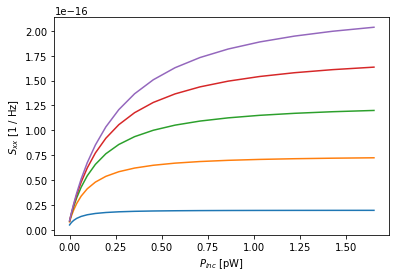

In [57]:
for n_star in np.arange(100,1500,300)*np.power(u.micron,-3):
    S_xx = kids.Sxx(alpha,f,Tstage,Tc,T_BB,V,n_star,tau_max,eta_pb,nu_opt,eta_opt=0.2,trans=1,N0=N0)
    plt.plot(P_inc,S_xx)
plt.xlabel(r'$P_{inc}$ ['+P_inc.unit.to_string()+']')
plt.ylabel(r'$S_{xx}$ ['+S_xx.unit.to_string()+']')
plt.show()

30.0 us


/Users/jaguirre/anaconda3/envs/starfire/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


130.0 us
230.0 us
330.0 us
430.0 us
530.0 us
630.0 us
730.0 us
830.0 us
930.0 us


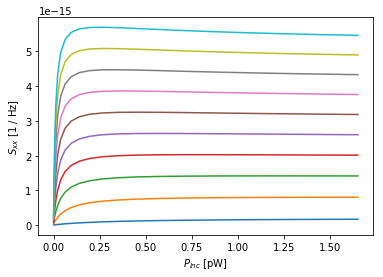

In [59]:
for tau_max in np.arange(30,1000,100)*u.microsecond:
    print(tau_max)
    S_xx = kids.Sxx(alpha,f,Tstage,Tc,T_BB,V,1300*np.power(u.micron,-3),
                    tau_max,eta_pb,nu_opt,eta_opt=0.2,trans=1,N0=N0)
    plt.plot(P_inc,S_xx)
plt.xlabel(r'$P_{inc}$ ['+P_inc.unit.to_string()+']')
plt.ylabel(r'$S_{xx}$ ['+S_xx.unit.to_string()+']')
plt.show()

In [101]:
# Ideal (?) devices
alpha = 0.73*u.dimensionless_unscaled
f = 200*u.MHz
Tstage = 0.215*u.K
Tc = 1.39*u.K
V = 57*np.power(u.micron,3)
# According to Jonas, this is more reasonable
n_star = 1300*(np.power(u.micron,-3))
tau_max = 35*u.microsecond
eta_pb = 0.57
nu_opt = (350*u.micron).to(u.GHz,equivalencies=u.spectral())
trans=1
eta_opt = 0.2*u.dimensionless_unscaled
N0=1.72e10*np.power(u.micron,-3)*np.power(u.eV,-1)

/Users/jaguirre/anaconda3/envs/starfire/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


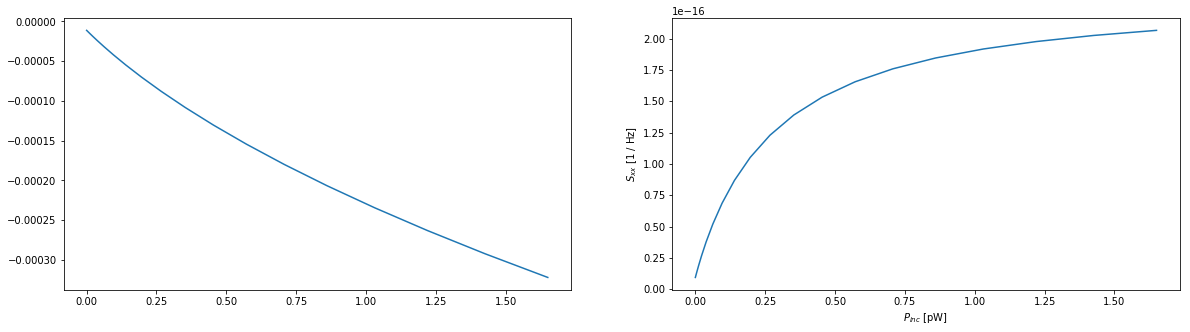

In [102]:
x = kids.xMB(alpha, f, Tstage, Tc, T_BB, V, n_star, tau_max, eta_pb, eta_opt)
S_xx = kids.Sxx(alpha,f,Tstage,Tc,T_BB,V,n_star,
                tau_max,eta_pb,nu_opt,eta_opt=eta_opt,trans=1,N0=N0)
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(P_inc,x)
plt.subplot(122)
plt.plot(P_inc,S_xx)
plt.xlabel(r'$P_{inc}$ ['+P_inc.unit.to_string()+']')
plt.ylabel(r'$S_{xx}$ ['+S_xx.unit.to_string()+']')
plt.show()

In [103]:
# Should add this to the kids code
dxdP = np.gradient(x)/np.gradient(P_inc.to(u.W))

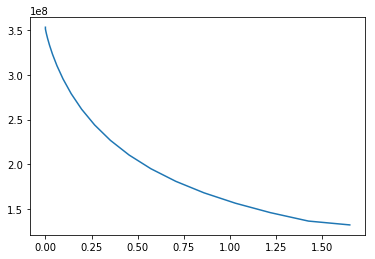

In [104]:
plt.plot(P_inc[2:],np.abs(dxdP[2:]))

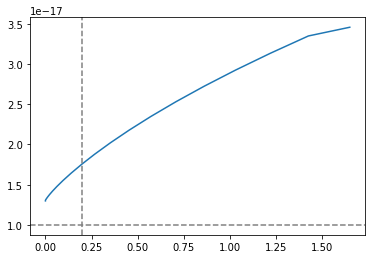

In [105]:
plt.plot(P_inc[2:],1./np.abs(dxdP[2:])*np.sqrt(S_xx_dark))
plt.axhline(1.e-17,linestyle='--',color='gray')
plt.axvline(0.2,linestyle='--',color='gray')
plt.show()

In [68]:
dxdP = 1.2e9/u.W
S_xx_dark = 2.1e-17/u.Hz
print(Qprint(1./dxdP*np.sqrt(S_xx_dark)))

3.82e-18 W / Hz(1/2)


In [69]:
# But isn't the NEP at any given loading a function of S_xx *at that loading*?  
# i.e., the photon shot noise *additional* noise beyond the photon generation-recombination, I think
def NEP(dxdP)